In [ ]:
#Import libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
import json

In [ ]:
# read the Excel file into a pandas dataframe
df = pd.read_csv('final.csv')

In [ ]:
#view the first 5 columns of our dataframe
df.head()

,Code,Hotel Name,Roomnights,Sale,Cost,Date,Country
0,CODE|87851,Best Western Premier Al Ahsa Grand Hotel & Suites,57,1140,1140,"01, 2019",Saudi Arabia
1,CODE|87816,Best Western Premier Airporthotel Fontane Berlin,1935,50310,38700,"08, 2019",Germany
2,CODE|87781,Best Western Premier Agung Resort Ubud,1897,37940,34146,"01, 2019",Indonesia
3,CODE|87746,Best Western Posada Freeman,1294,38820,25880,"06, 2019",Mexico
4,CODE|87711,Best Western Pony Soldier Inn & Suites,828,22356,13248,"12, 2019",USA


In [ ]:
#view the dataframe shape
df.shape

(2527, 7)

In [ ]:
#view the descriptive statistics for df
df.describe()

,Roomnights,Sale,Cost
count,2527.000000,2527.000000,2527.000000
mean,999.712703,25050.661258,17536.134151
std,575.224433,14882.519462,10281.580310
min,1.000000,28.000000,16.000000
25%,500.000000,12434.000000,8686.000000
50%,1000.000000,24549.000000,17478.000000
75%,1498.000000,37042.000000,25952.000000
max,1999.000000,59130.000000,39720.000000


In [ ]:
#check if any null values
df.isna().sum()

Code          0
Hotel Name    0
Roomnights    0
Sale          0
Cost          0
Date          0
Country       0
dtype: int64

In [ ]:
#check the types of each column
df.dtypes

Code          object
Hotel Name    object
Roomnights     int64
Sale           int64
Cost           int64
Date          object
Country       object
dtype: object

In [ ]:
#Check any duplicated rows in our df
df.duplicated().sum()

27

In [ ]:
#drop duplicates
df = df.drop_duplicates()

In [ ]:
#Split the Data column to , Month and Year
df['Month']=df['Date'].str[:2]
df['Year']=df['Date'].str[-4:]
#Split the Code column to the code number only
df['Code']=df['Code'].str[5:]
#drop Data Column after modifying it
df = df.drop('Date', axis=1)

In [ ]:
#Create Column for net profit =sales-costs
df['Net_Profit']=df['Sale']-df['Cost']

In [ ]:
#View the highest 5 hotels in profits
highest_profit = df.nlargest(5, 'Net_Profit')[['Hotel Name','Net_Profit']]
highest_profit

,Hotel Name,Net_Profit
2201,acora Hotel und Wohnen,28350
474,Best Western City Hotel Moran,27706
2350,Aber Khamis Mushait,27495
1165,Arthur Garden Inn Hotel,27286
599,Bel Azur Hotel,27258


In [ ]:
#View the lowest 5 hotels in profit
lowest_profit = df.nsmallest(5, 'Net_Profit')[['Hotel Name','Net_Profit']]
lowest_profit

,Hotel Name,Net_Profit
2385,9Hotel Republique,-1275
2448,Sheraton Moscow Sheremetyevo Airport Hotel,-1122
2351,Aber City Center,-316
2430,#bunk Hotel,-72
0,Best Western Premier Al Ahsa Grand Hotel & Suites,0


In [ ]:
#Divide our dataset to three clusters depending on Roomnights
demand_clusters = df.groupby(pd.cut(df['Roomnights'], bins=3)).ngroup()

# create a dictionary that maps the group labels to cluster labels
demand_cluster_labels = {0: 'low demand', 1: 'mid demand', 2: 'high demand'}

# add a new column with the cluster labels
df['demand Cluster'] = demand_clusters.map(demand_cluster_labels)

In [ ]:
#View the final shape of our data
df.head()

,Code,Hotel Name,Roomnights,Sale,Cost,Country,Month,Year,Net_Profit,demand Cluster
0,87851,Best Western Premier Al Ahsa Grand Hotel & Suites,57,1140,1140,Saudi Arabia,01,2019,0,low demand
1,87816,Best Western Premier Airporthotel Fontane Berlin,1935,50310,38700,Germany,08,2019,11610,high demand
2,87781,Best Western Premier Agung Resort Ubud,1897,37940,34146,Indonesia,01,2019,3794,high demand
3,87746,Best Western Posada Freeman,1294,38820,25880,Mexico,06,2019,12940,mid demand
4,87711,Best Western Pony Soldier Inn & Suites,828,22356,13248,USA,12,2019,9108,mid demand


##Graphs

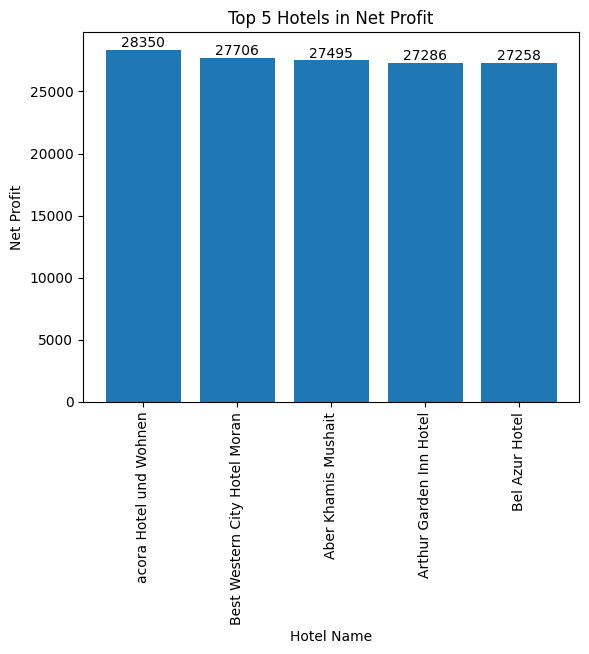

In [ ]:

top_5 = df.nlargest(5, 'Net_Profit')

# create a bar chart of the net_profit values for the top 5 hotels
fig, ax = plt.subplots()
ax.bar(top_5['Hotel Name'], top_5['Net_Profit'])
ax.set_xlabel('Hotel Name')
ax.set_ylabel('Net Profit')
ax.set_title('Top 5 Hotels in Net Profit')
plt.xticks(rotation=90)

# add the value of each bar to the plot
for i, v in enumerate(top_5['Net_Profit']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

These are the Top Winners in2019 we can see thtat there net profit are very near from each others


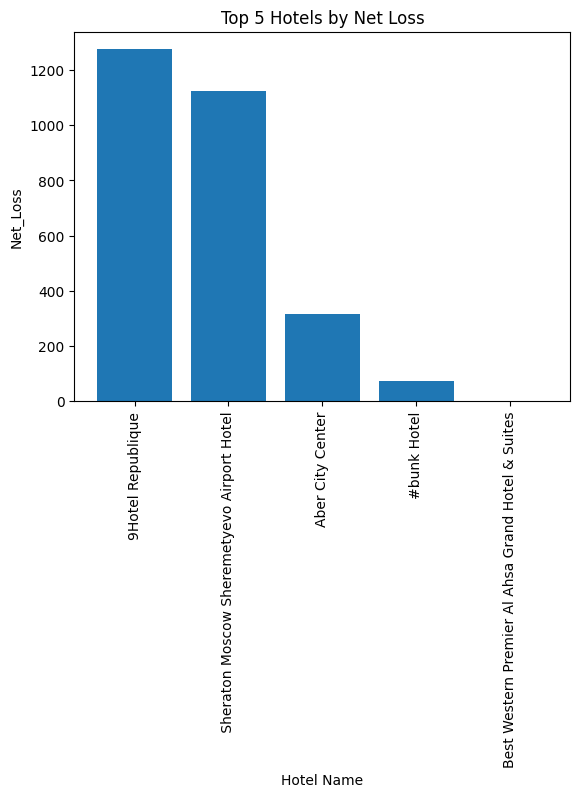

In [ ]:
# sort the DataFrame by 'Net Profit' in descending order and select the top 5 rows
top_5 = df.sort_values('Net_Profit', ascending=True).head(5)

# create a bar chart of the top 5 hotels based on net profit
plt.bar(top_5['Hotel Name'], abs(top_5['Net_Profit']))
plt.xlabel('Hotel Name')
plt.ylabel('Net_Loss')
plt.title('Top 5 Hotels by Net Loss')
plt.xticks(rotation=90)

plt.show()

There are the Top losers of 2019 they have more costs than their sales

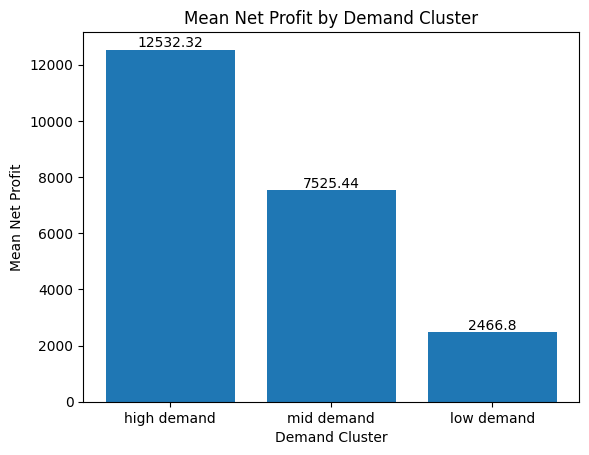

In [ ]:
grouped = df.groupby('demand Cluster')['Net_Profit'].mean().reset_index()

# sort the DataFrame by mean net_profit in descending order
grouped = grouped.sort_values('Net_Profit', ascending=False)

# create a bar chart of the mean net_profit values for each demand_cluster
fig, ax = plt.subplots()
ax.bar(grouped['demand Cluster'], grouped['Net_Profit'])
ax.set_xlabel('Demand Cluster')
ax.set_ylabel('Mean Net Profit')
ax.set_title('Mean Net Profit by Demand Cluster')

# add the value of each bar to the plot
for i, v in enumerate(grouped['Net_Profit']):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

This Graph represent the mean profit per each cluster of hotels

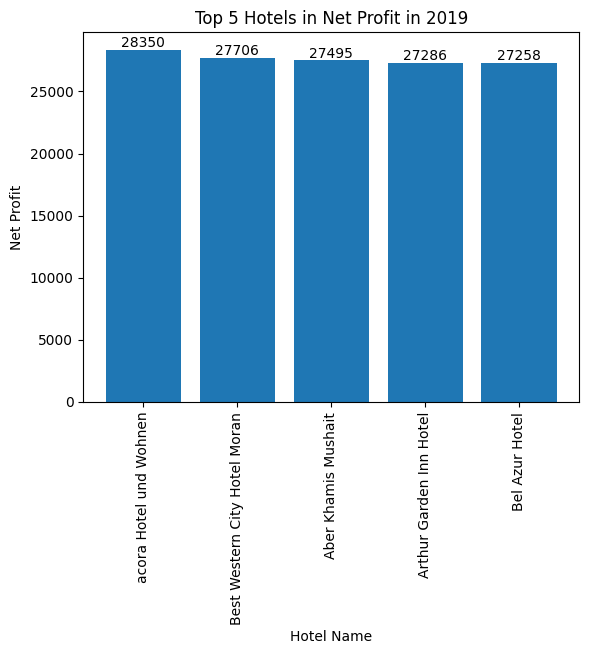

In [ ]:
top_5 = df[df['Year'] == '2019'].nlargest(5, 'Net_Profit')

# create a bar chart of the net_profit values for the top 5 hotels in 2019
fig, ax = plt.subplots()
ax.bar(top_5['Hotel Name'], top_5['Net_Profit'])
ax.set_xlabel('Hotel Name')
ax.set_ylabel('Net Profit')
ax.set_title('Top 5 Hotels in Net Profit in 2019')
plt.xticks(rotation=90)
# add the value of each bar to the plot
for i, v in enumerate(top_5['Net_Profit']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

As most of data are in 2019 we can see no much difference in our top winners

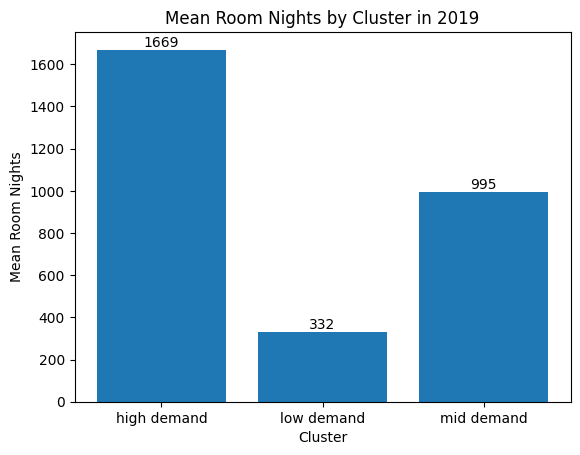

In [ ]:
# filter the DataFrame to keep only the rows for 2019
df_2019 = df[df['Year'] == '2019']

# group the DataFrame by cluster and calculate the mean room nights for each group
grouped = df_2019.groupby('demand Cluster')['Roomnights'].mean().reset_index()

# create a bar chart of the mean room nights for each cluster
fig, ax = plt.subplots()
ax.bar(grouped['demand Cluster'], grouped['Roomnights'])
ax.set_xlabel('Cluster')
ax.set_ylabel('Mean Room Nights')
ax.set_title('Mean Room Nights by Cluster in 2019')
for i, v in enumerate(grouped['Roomnights']):
    ax.text(i, v, str(int(v)), ha='center', va='bottom')
plt.show()

As we expected the highest demand is the highest room nights in 2019

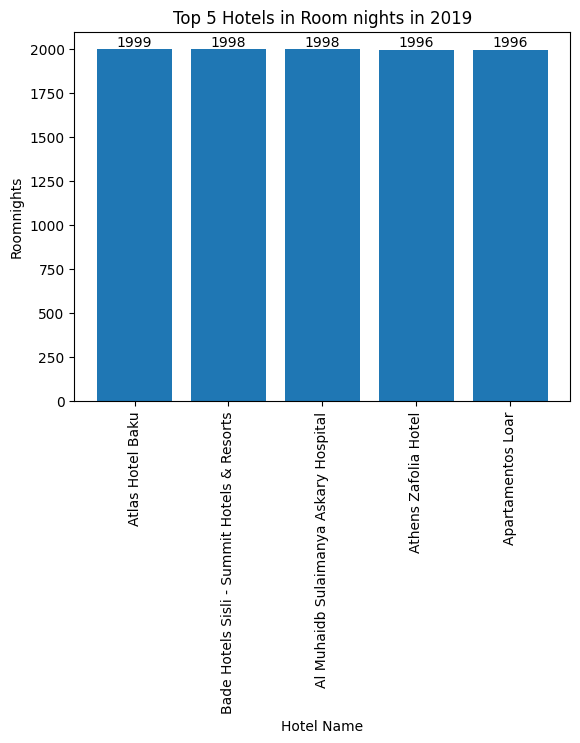

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df1=df[df['Year']=='2019']
top_5 = df1.nlargest(5, 'Roomnights')

# create a bar chart of the net_profit values for the top 5 hotels
fig, ax = plt.subplots()
ax.bar(top_5['Hotel Name'], top_5['Roomnights'])
ax.set_xlabel('Hotel Name')
ax.set_ylabel('Roomnights')
ax.set_title('Top 5 Hotels in Room nights in 2019')
plt.xticks(rotation=90)

# add the value of each bar to the plot
for i, v in enumerate(top_5['Roomnights']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

These are the most engaged hotels in 2019 with the most roomnights

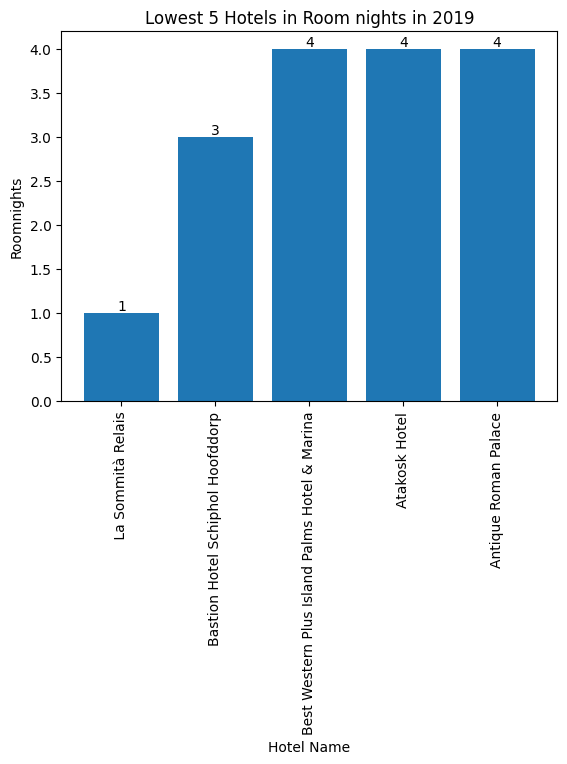

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

top_5 = df1.nsmallest(5, 'Roomnights')

# create a bar chart of the net_profit values for the top 5 hotels
fig, ax = plt.subplots()
ax.bar(top_5['Hotel Name'], top_5['Roomnights'])
ax.set_xlabel('Hotel Name')
ax.set_ylabel('Roomnights')
ax.set_title('Lowest 5 Hotels in Room nights in 2019')
plt.xticks(rotation=90)

# add the value of each bar to the plot
for i, v in enumerate(top_5['Roomnights']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

These are the lowest engaged hotels in 2019 according to roomnights

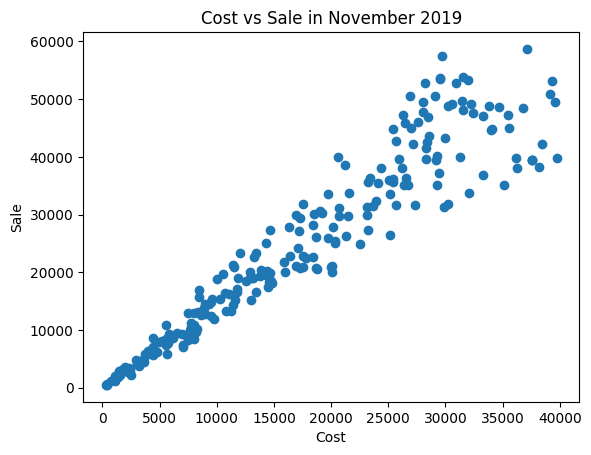

In [ ]:
# filter the DataFrame to keep only the rows for November 2019
df_nov_2019 = df[(df['Year'] == '2019') & (df['Month'] == '11')]

# create a scatter plot of cost vs sale
fig, ax = plt.subplots()
ax.scatter(df_nov_2019['Cost'], df_nov_2019['Sale'])
ax.set_xlabel('Cost')
ax.set_ylabel('Sale')
ax.set_title('Cost vs Sale in November 2019')

plt.show()

This scatterplot for any month(eg. November 2019) has direct and positive correlation betwen costs and sales as we can understand the more you spend costs the more you gain sales

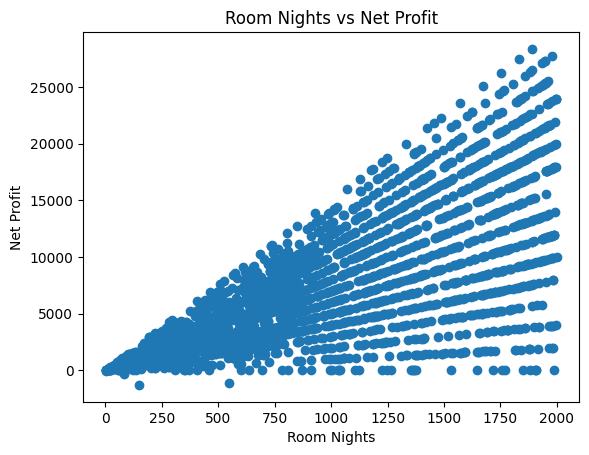

In [ ]:
# create a scatter plot of Room_Nights vs Net_Profit
fig, ax = plt.subplots()
ax.scatter(df['Roomnights'], df['Net_Profit'])
ax.set_xlabel('Room Nights')
ax.set_ylabel('Net Profit')
ax.set_title('Room Nights vs Net Profit')

plt.show()

There is a positive correlation between Room_Nights and Net_Profit. We can see that as the number of Room_Nights increase, the Net_Profit tends to increase as well. This suggests that a hotel's profitability is positively influenced by the number of rooms occupied.

There is a wide range of values for Net_Profit even for similar values of Room_Nights. This suggests that there are other factors that influence a hotel's profitability, besides the number of rooms occupied. These factors could include the hotel's location, pricing strategy, operational efficiency, and customer satisfaction, among others.

Text(0.5, 1.0, 'sales per cluster every year')

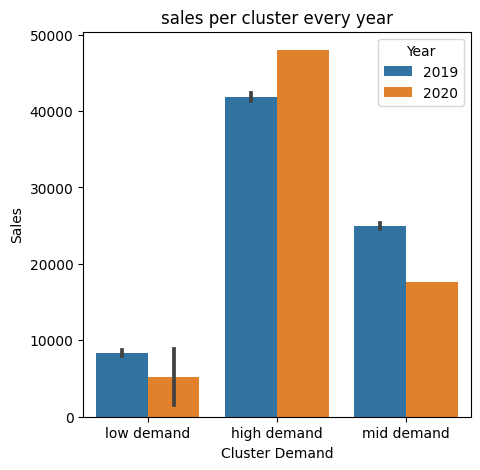

In [ ]:

plt.figure(figsize=(5,5))
sb.barplot(data=df ,x='demand Cluster',y='Sale',hue='Year')
plt.xlabel("Cluster Demand")
plt.ylabel("Sales")
plt.title("sales per cluster every year")

This graph is very tricky because you can think that the sales in 2019 and 2020 are near but it is not because 99% of our data in 2019 and only 1% and we plot the mean value so it will lead to miss understanding(Not Preferable Plot)

In [ ]:
df['Year'].value_counts()

2019    2496
2020       4
Name: Year, dtype: int64

Text(0.5, 1.0, 'profit for every cluster in the first 3 months of the year')

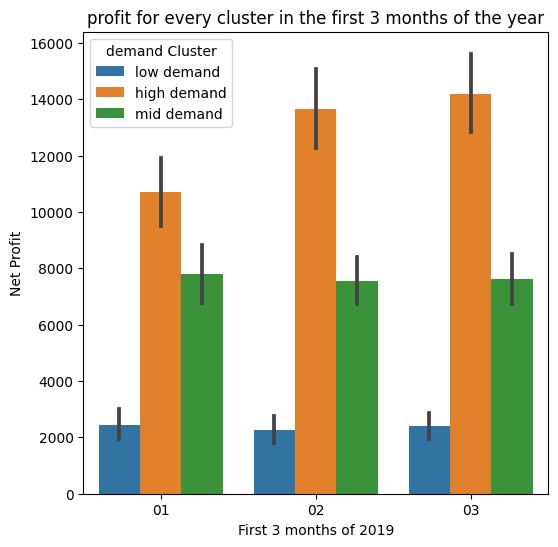

In [ ]:
df1=df[df['Year'] == '2019']
df1=df1[df1['Month'].isin(['01', '02', '03'])]
plt.figure(figsize=(6,6))
sb.barplot(data=df1 ,x='Month',y='Net_Profit',hue='demand Cluster')
plt.xlabel("First 3 months of 2019")
plt.ylabel("Net Profit")
plt.title("profit for every cluster in the first 3 months of the year")

Compare the Profit for the first 3 months in 2019 ,This is a good plot and will not lead to any misunderstanding as the data in each month is equivalent

##Country

In [ ]:
df = df[df['Country'] != 'Not Found']

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from translate import Translator
translator= Translator(from_lang='arabic',to_lang="english")

In [ ]:
#create function to check the arabic names
import re

def is_arabic(text):
    # Match Arabic text using Unicode character ranges
    return bool(re.search(r'[\u0600-\u06FF]+', text))

In [ ]:
#convert arabiic named country to english
for i in range(len(df)):
  if(is_arabic(df['Country'][i])):
    df['Country'][i] = translator.translate(df['Country'][i])


In [ ]:
#modify some country names
df['Country'] = df['Country'].replace('America', 'USA')
df['Country'] = df['Country'].replace('Italia', 'Italy')
df['Country'] = df['Country'].replace('Saudi', 'Saudi Arabia')
df['Country'] = df['Country'].replace('SVE', 'Sweden')
df['Country'] = df['Country'].replace('Schweiz', 'Switzerland')
df['Country'] = df['Country'].replace('Deutschland', 'Germany')
df['Country'] = df['Country'].replace('United Kingdom', 'UK')
df['Country'] = df['Country'].replace('THAILAND', 'Thailand')
df['Country'] = df['Country'].replace('Nederland', 'Netherlands')
df['Country'] = df['Country'].replace('Österreich', 'Austria')
df['Country'] = df['Country'].replace('España', 'Spain')
df['Country'] = df['Country'].replace('SPAIN', 'Spain')
df['Country'] = df['Country'].replace('SC', 'Syechelles')
df['Country'] = df['Country'].replace('Ελλάδα', 'Greece')
df['Country'] = df['Country'].replace('QA', 'Qatar')
df['Country'] = df['Country'].replace('Bénin', 'Benin')
df['Country'] = df['Country'].replace('Indian', 'India')
df['Country'] = df['Country'].replace('IN', 'India')
df['Country'] = df['Country'].replace('ZA', 'South Africa')
df['Country'] = df['Country'].replace('ID', 'Indonesia')
df['Country'] = df['Country'].replace('Polska', 'Poland')
df['Country'] = df['Country'].replace('SA', 'Saudi Arabia')


In [ ]:
df['Country'].value_counts()

In [ ]:
#the most and least countries by profits
net_profit_by_country = df.groupby('Country')['Net_Profit'].sum()

# Sort in descending order
sorted_net_profit = net_profit_by_country.sort_values(ascending=False)

# Get the top and bottom 5 countries by net profit
top_5_countries = sorted_net_profit.head(5)
bottom_5_countries = sorted_net_profit.tail(5)

In [ ]:
top_5_countries.to_frame()

In [ ]:
bottom_5_countries.to_frame()

In [ ]:
#most countries by sale
total_sale_by_country = df.groupby('Country')['Sale'].sum().sort_values(ascending=False)

In [ ]:
total_sale_by_country.to_frame().head()

In [ ]:
#Geographical visual by sale
import plotly.express as px
# Group by country and calculate the sum of sale
total_sale_by_country = df.groupby('Country')['Sale'].sum().reset_index()

# Create choropleth map
fig = px.choropleth(total_sale_by_country, locations='Country', locationmode='country names', color='Sale', hover_name='Country', title='Total Sales by Country')
fig.show()

In [ ]:
#Geographical visual by profit
import plotly.express as px
# Group by country and calculate the sum of sale
total_sale_by_country = df.groupby('Country')['Net_Profit'].sum().reset_index()

# Create choropleth map
fig = px.choropleth(total_sale_by_country, locations='Country', locationmode='country names', color='Net_Profit', hover_name='Country', title='Total Profit by Country')
fig.show()